In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display

In [3]:
features3sec=pd.read_csv('MCnR/features_3_sec.csv')
features3sec.shape

(9990, 60)

In [4]:
features3sec = features3sec.drop(labels='filename',axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder
labels = features3sec.iloc[:,-1]
convertor=LabelEncoder()
y=convertor.fit_transform(labels)
y

array([0, 0, 0, ..., 9, 9, 9])

In [6]:
features3sec.iloc[:,:-1]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


In [7]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(np.array(features3sec.iloc[:,:-1],dtype = float))

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [9]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (6693, 58)
x_test: (3297, 58)
y_train: (6693,)
y_test: (3297,)


In [10]:
print(len(y_train),len(y_test))

6693 3297


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [12]:
model=Sequential()
#first layer
model.add(Dense(512,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#third layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#fourth layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#final layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [69]:
!pip3 install keras-visualizer

In [73]:
!pip3 install graphviz

In [77]:
!pip3 install pydot

In [101]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=8e2892e04e2bedaa1452881e7d97e05258179689663bdbca3fe6d120edad5ad2
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


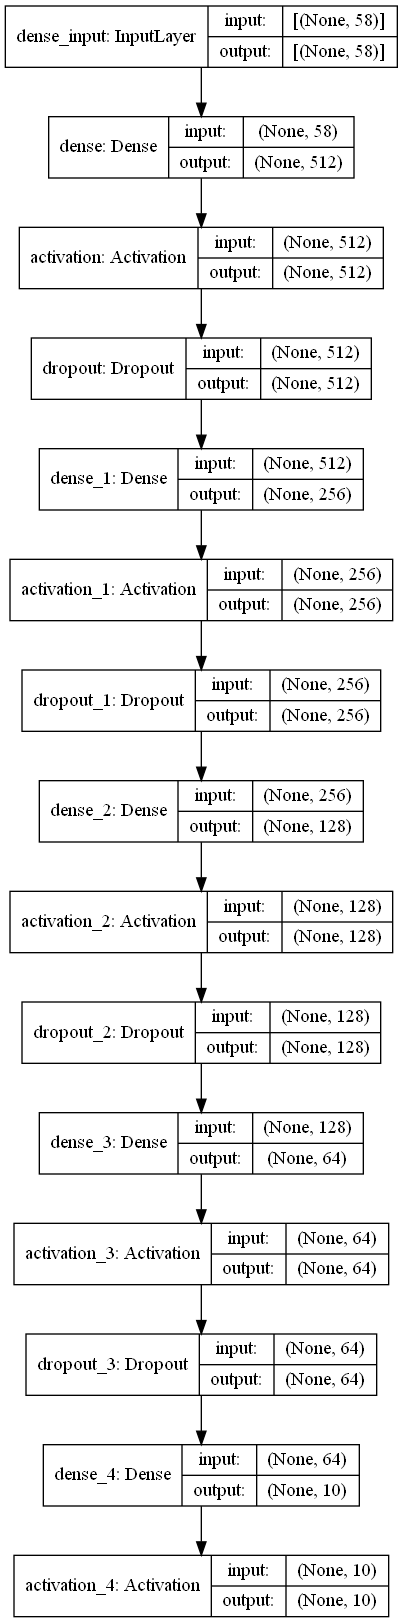

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics ='accuracy',optimizer='adam')

In [16]:
epochsCount=600
batchSize=128
modelHistory=model.fit(x_train,y_train,batch_size=batchSize,epochs=epochsCount,validation_data=(x_test,y_test))

Epoch 1/600
53/53 [==============================] - 2s 19ms/step - loss: 1.6628 - accuracy: 0.4071 - val_loss: 1.0884 - val_accuracy: 0.6275
Epoch 2/600
53/53 [==============================] - 1s 13ms/step - loss: 1.1339 - accuracy: 0.6014 - val_loss: 0.8443 - val_accuracy: 0.7191
Epoch 3/600
53/53 [==============================] - 1s 12ms/step - loss: 0.9434 - accuracy: 0.6664 - val_loss: 0.7262 - val_accuracy: 0.7580
Epoch 4/600
53/53 [==============================] - 1s 13ms/step - loss: 0.8251 - accuracy: 0.7173 - val_loss: 0.6602 - val_accuracy: 0.7762
Epoch 5/600
53/53 [==============================] - 1s 12ms/step - loss: 0.7233 - accuracy: 0.7524 - val_loss: 0.6099 - val_accuracy: 0.7892
Epoch 6/600
53/53 [==============================] - 1s 12ms/step - loss: 0.6549 - accuracy: 0.7774 - val_loss: 0.5487 - val_accuracy: 0.8174
Epoch 7/600
53/53 [==============================] - 1s 12ms/step - loss: 0.5992 - accuracy: 0.8010 - val_loss: 0.5171 - val_accuracy: 0.8247
Epoch 

53/53 [==============================] - 1s 13ms/step - loss: 0.0504 - accuracy: 0.9831 - val_loss: 0.3481 - val_accuracy: 0.9157
Epoch 59/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0535 - accuracy: 0.9813 - val_loss: 0.3455 - val_accuracy: 0.9160
Epoch 60/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.3422 - val_accuracy: 0.9157
Epoch 61/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0511 - accuracy: 0.9828 - val_loss: 0.3729 - val_accuracy: 0.9120
Epoch 62/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0604 - accuracy: 0.9824 - val_loss: 0.3467 - val_accuracy: 0.9166
Epoch 63/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.3765 - val_accuracy: 0.9093
Epoch 64/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.3120 - val_accuracy: 0.9184
Epoch 65/600

53/53 [==============================] - 1s 12ms/step - loss: 0.0456 - accuracy: 0.9877 - val_loss: 0.3534 - val_accuracy: 0.9242
Epoch 116/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.3353 - val_accuracy: 0.9224
Epoch 117/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0397 - accuracy: 0.9889 - val_loss: 0.3303 - val_accuracy: 0.9239
Epoch 118/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.3534 - val_accuracy: 0.9230
Epoch 119/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.3462 - val_accuracy: 0.9278
Epoch 120/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.3735 - val_accuracy: 0.9254
Epoch 121/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.4093 - val_accuracy: 0.9230
Epoch 

53/53 [==============================] - 1s 12ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.3554 - val_accuracy: 0.9266
Epoch 173/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.3466 - val_accuracy: 0.9272
Epoch 174/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0322 - accuracy: 0.9910 - val_loss: 0.3497 - val_accuracy: 0.9263
Epoch 175/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0376 - accuracy: 0.9873 - val_loss: 0.3612 - val_accuracy: 0.9224
Epoch 176/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.3543 - val_accuracy: 0.9233
Epoch 177/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.3914 - val_accuracy: 0.9208
Epoch 178/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.4115 - val_accuracy: 0.9208
Epoch 

53/53 [==============================] - 1s 12ms/step - loss: 0.0162 - accuracy: 0.9939 - val_loss: 0.3863 - val_accuracy: 0.9236
Epoch 230/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0167 - accuracy: 0.9933 - val_loss: 0.3895 - val_accuracy: 0.9227
Epoch 231/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.3835 - val_accuracy: 0.9251
Epoch 232/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.3811 - val_accuracy: 0.9230
Epoch 233/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.4193 - val_accuracy: 0.9208
Epoch 234/600
53/53 [==============================] - 1s 11ms/step - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.4152 - val_accuracy: 0.9224
Epoch 235/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.4396 - val_accuracy: 0.9154
Epoch 2

53/53 [==============================] - 1s 13ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.4271 - val_accuracy: 0.9239
Epoch 287/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.4497 - val_accuracy: 0.9193
Epoch 288/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.4283 - val_accuracy: 0.9236
Epoch 289/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.3922 - val_accuracy: 0.9293
Epoch 290/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.3973 - val_accuracy: 0.9272
Epoch 291/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.4133 - val_accuracy: 0.9205
Epoch 292/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.4417 - val_accuracy: 0.9208
Epoch 293/6

53/53 [==============================] - 0s 8ms/step - loss: 0.0140 - accuracy: 0.9943 - val_loss: 0.4062 - val_accuracy: 0.9257
Epoch 344/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.9939 - val_loss: 0.3957 - val_accuracy: 0.9254
Epoch 345/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0103 - accuracy: 0.9960 - val_loss: 0.3998 - val_accuracy: 0.9260
Epoch 346/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.3930 - val_accuracy: 0.9260
Epoch 347/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.4216 - val_accuracy: 0.9205
Epoch 348/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.3895 - val_accuracy: 0.9269
Epoch 349/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0172 - accuracy: 0.9957 - val_loss: 0.4212 - val_accuracy: 0.9236
Epoch 350/

53/53 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.9958 - val_loss: 0.3740 - val_accuracy: 0.9290
Epoch 401/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.4129 - val_accuracy: 0.9327
Epoch 402/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.3896 - val_accuracy: 0.9324
Epoch 403/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0092 - accuracy: 0.9961 - val_loss: 0.4338 - val_accuracy: 0.9284
Epoch 404/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.4590 - val_accuracy: 0.9315
Epoch 405/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.4832 - val_accuracy: 0.9236
Epoch 406/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.4529 - val_accuracy: 0.9315
Epoch 40

53/53 [==============================] - 1s 12ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.4872 - val_accuracy: 0.9205
Epoch 458/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.4560 - val_accuracy: 0.9287
Epoch 459/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.4447 - val_accuracy: 0.9278
Epoch 460/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.4362 - val_accuracy: 0.9290
Epoch 461/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.4548 - val_accuracy: 0.9236
Epoch 462/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0109 - accuracy: 0.9958 - val_loss: 0.4408 - val_accuracy: 0.9263
Epoch 463/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.4449 - val_accuracy: 0.9257
Epoch 

53/53 [==============================] - 1s 12ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.4183 - val_accuracy: 0.9305
Epoch 515/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.4385 - val_accuracy: 0.9290
Epoch 516/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.4473 - val_accuracy: 0.9302
Epoch 517/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.4537 - val_accuracy: 0.9293
Epoch 518/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.4671 - val_accuracy: 0.9263
Epoch 519/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0143 - accuracy: 0.9940 - val_loss: 0.4343 - val_accuracy: 0.9345
Epoch 520/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.4507 - val_accuracy: 0.9293
Epoch 

53/53 [==============================] - 1s 12ms/step - loss: 0.0124 - accuracy: 0.9948 - val_loss: 0.5247 - val_accuracy: 0.9239
Epoch 572/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.5317 - val_accuracy: 0.9278
Epoch 573/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.4920 - val_accuracy: 0.9251
Epoch 574/600
53/53 [==============================] - 1s 14ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.5038 - val_accuracy: 0.9248
Epoch 575/600
53/53 [==============================] - 1s 12ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.4869 - val_accuracy: 0.9230
Epoch 576/600
53/53 [==============================] - 1s 13ms/step - loss: 0.0092 - accuracy: 0.9966 - val_loss: 0.5101 - val_accuracy: 0.9248
Epoch 577/600
53/53 [==============================] - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.4892 - val_accuracy: 0.9281
Epoch 

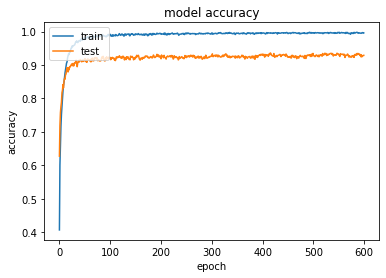

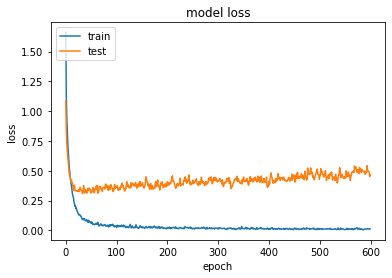

In [17]:
# summarize history for accuracy
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
predictLabel=model.predict(x_test[:2])
classesLabel=np.argmax(predictLabel,axis=1)
classesLabel=convertor.inverse_transform(classesLabel)
classesLabel

array(['pop', 'metal'], dtype=object)